In [1]:
# https://ntguardian.wordpress.com/2016/09/19/introduction-stock-market-data-python-1/
import pandas as pd

In [12]:
import matplotlib.pyplot as plt   # Import matplotlib
# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots

Populating the interactive namespace from numpy and matplotlib


In [17]:
# load stock info from local
# more info see ./save-stock-info.py
apple = pd.read_csv("./data/AAPL.csv", index_col=0)
ms = pd.read_csv("./data/MSFT.csv", index_col=0)

In [18]:
type(apple) # pandas.core.frame.DataFrame

pandas.core.frame.DataFrame

In [19]:
apple.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,172.300003,169.259995,170.160004,172.259995,25555900.0,166.353714
2018-01-03,174.550003,171.960007,172.529999,172.229996,29517900.0,166.324722
2018-01-04,173.470001,172.080002,172.539993,173.029999,22434600.0,167.097290
2018-01-05,175.369995,173.050003,173.440002,175.000000,23660000.0,168.999741
2018-01-08,175.610001,173.929993,174.350006,174.350006,20567800.0,168.372040


In [21]:
apple["2018"]["Adj Close"].plot()

KeyError: '2018'

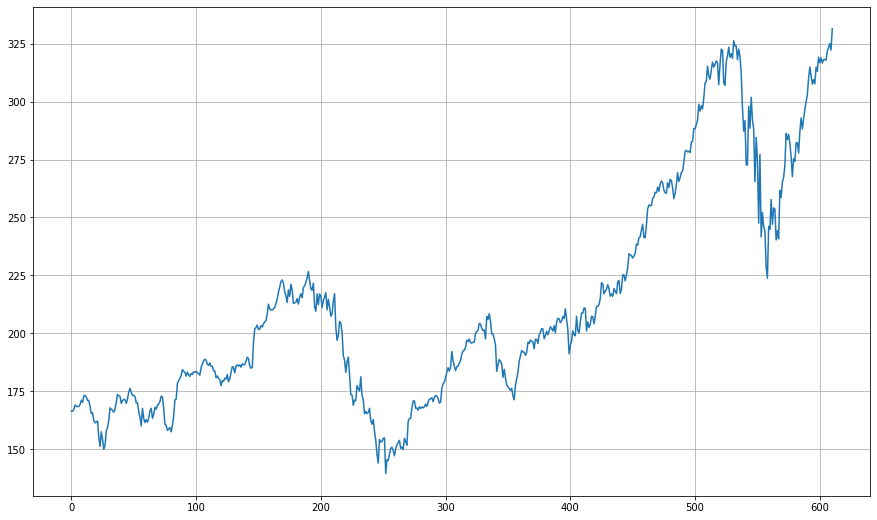

In [14]:
apple["Adj Close"].plot(grid = True) # Plot the adjusted closing price of AAPL

# ms_price = ms[["Adj. Close"]]
# ms_price.rename(columns={"Adj. Close":"MSFT"}, inplace=True)


In [22]:
# apple_price = apple[["Adj. Close"]]
# apple_price.rename(columns={"Adj. Close":"AAPL"}, inplace=True)

# Below I create a DataFrame consisting of the adjusted closing price of these stocks, first by making a list of these objects and using the join method
stocks = pd.DataFrame({"AAPL": apple["Adj Close"],
                      "MSFT": ms["Adj Close"]})

In [23]:
# both_stocks = ms_price.join(apple_price, how="inner")
# both_stocks.plot()
stocks.head()

,AAPL,MSFT
Date,,
2018-01-02,166.353714,82.798996
2018-01-03,166.324722,83.184326
2018-01-04,167.097290,83.916473
2018-01-05,168.999741,84.956886
2018-01-08,168.372040,85.043571


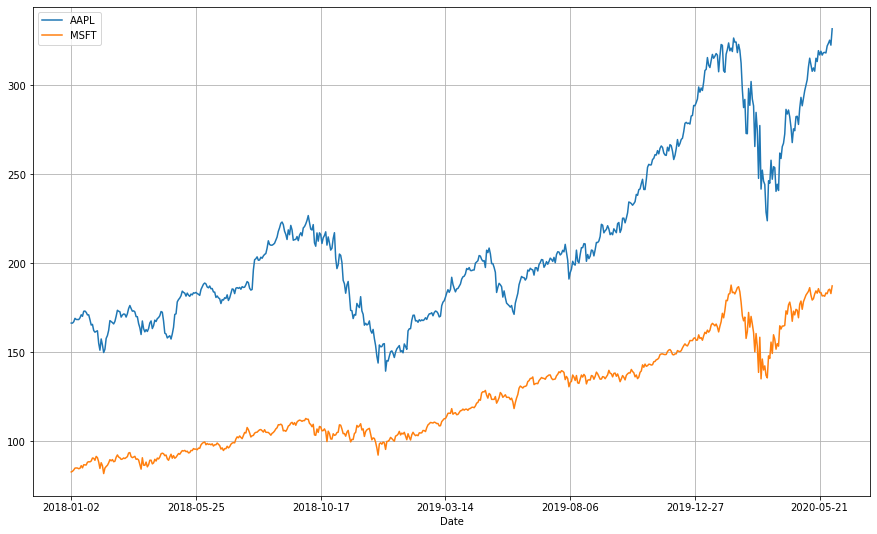

In [24]:
stocks.plot(grid = True)

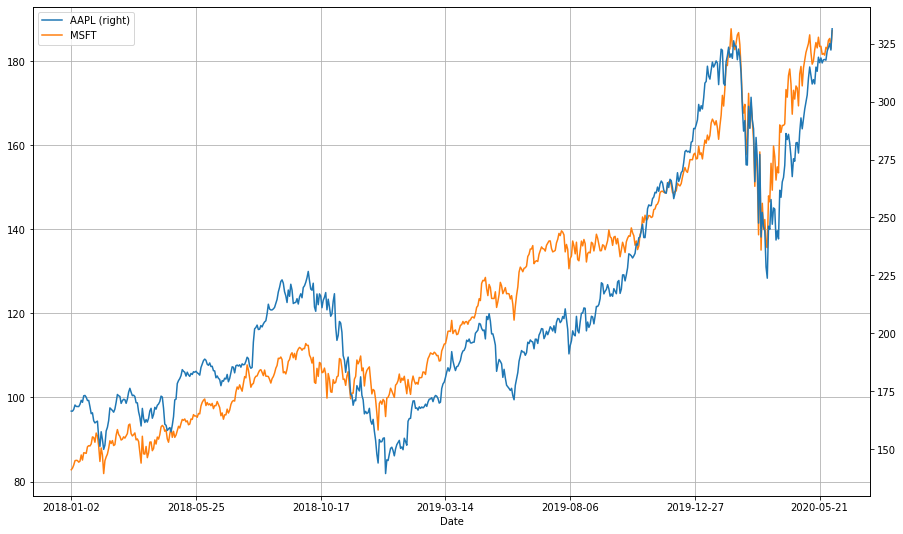

In [26]:
stocks.plot(secondary_y = ["AAPL"], grid = True)

In [27]:
# df.apply(arg) will apply the function arg to each column in df, and return a DataFrame with the result
# Recall that lambda x is an anonymous function accepting parameter x; in this case, x will be a pandas Series object
stock_return = stocks.apply(lambda x: x / x[0])
stock_return.head()

,AAPL,MSFT
Date,,
2018-01-02,1.000000,1.000000
2018-01-03,0.999826,1.004654
2018-01-04,1.004470,1.013496
2018-01-05,1.015906,1.026062
2018-01-08,1.012133,1.027109


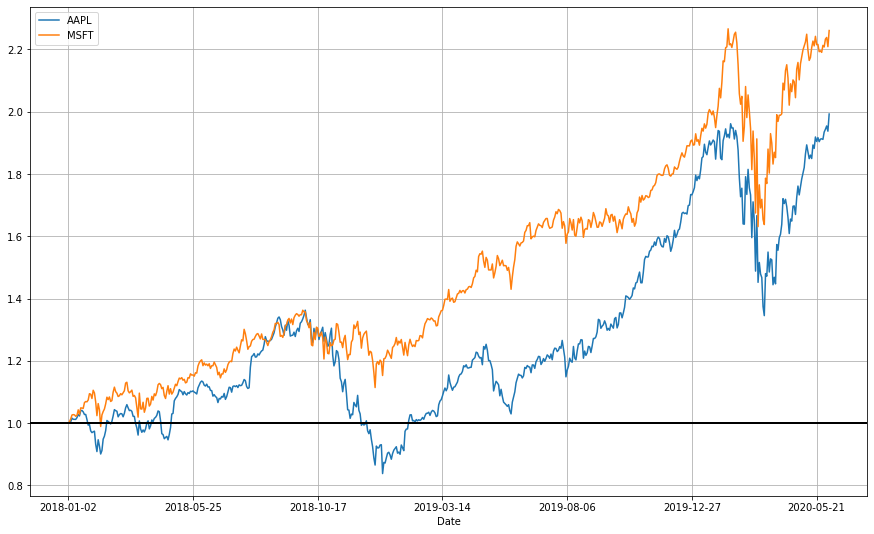

In [28]:
stock_return.plot(grid = True).axhline(y = 1, color = "black", lw = 2)